# train reward

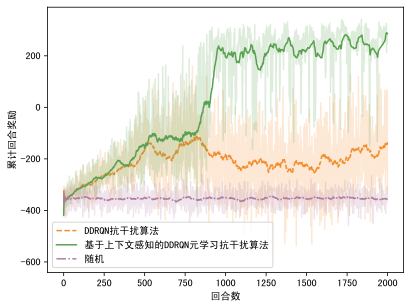

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

index_max = 0

maxlen = 2000

data1 = pd.read_csv('DDRQN/reward.csv').values[:,1][:maxlen]
data2 = pd.read_csv('DDRQN-context/reward.csv').values[:,1][:maxlen]
data3 = pd.read_csv('RANDOM/reward.csv').values[:,1][:maxlen]

def moving_average(data, window_size):
    processed_data = []
    for i in range(len(data)):
        if i < window_size:
            processed_data.append(np.mean(data[:i+1]))
        else:
            processed_data.append(np.mean(data[i-window_size:i]))
    return processed_data

ws = 50

data1_moving = moving_average(data1, ws)
data2_moving = moving_average(data2, ws)
data3_moving = moving_average(data3, ws)

plt.plot(np.arange(len(data1)), data1, color='#f28e2b', alpha=0.2)
plt.plot(np.arange(len(data1)), data1_moving, color='#f28e2b', label='DDRQN抗干扰算法', linestyle='dashed')

plt.plot(np.arange(len(data2)), data2, color='#59a14f', alpha=0.2)
plt.plot(np.arange(len(data2)), data2_moving, color='#59a14f', label='基于上下文感知的DDRQN元学习抗干扰算法')

plt.plot(np.arange(len(data3)), data3, color='#b07aa1', alpha=0.2)
plt.plot(np.arange(len(data3)), data3_moving, color='#b07aa1', label='随机', linestyle='-.')

# plt.ylim(-900, 300)

plt.legend()
# plt.grid(True)
plt.xlabel('回合数')
plt.ylabel('累计回合奖励')
plt.savefig('reward train.png', dpi=600)
plt.show()

# test reward

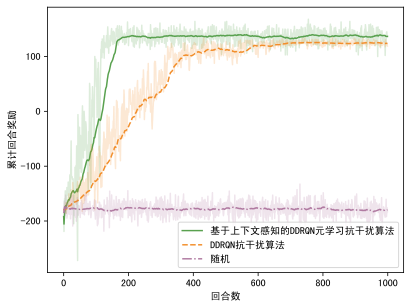

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

data1 = pd.read_csv('DDRQN-context-test/reward.csv').values[:,1]
plt.plot(np.arange(len(data1)), data1, color='#59a14f', alpha=0.2)
plt.plot(np.arange(len(data1)), moving_average(data1, ws), color='#59a14f', label='基于上下文感知的DDRQN元学习抗干扰算法')

data1 = pd.read_csv('DDRQN-test/reward.csv').values[:,1]
plt.plot(np.arange(len(data1)), data1, color='#f28e2b', alpha=0.2)
plt.plot(np.arange(len(data1)), moving_average(data1, ws), color='#f28e2b', label='DDRQN抗干扰算法', linestyle='dashed')

data1 = pd.read_csv('RANDOM-test/reward.csv').values[:,1]
plt.plot(np.arange(len(data1)), data1, color='#b07aa1', alpha=0.2)
plt.plot(np.arange(len(data1)), moving_average(data1, ws), color='#b07aa1', label='随机', linestyle='-.')

# plt.ylim(-500, 200)
# plt.xlim(0, 600)
plt.legend(loc='lower right')
plt.xlabel('回合数')
plt.ylabel('累计回合奖励')
plt.savefig('reward test.png', dpi=600)

# Data loader

In [3]:
import numpy as np

path = 'DDRQN-test'
rew1 = np.load(path + '/rew.npy')
energy1 = np.load(path + '/energy.npy')
hop1 = np.load(path + '/hop.npy')
suc1 = np.load(path + '/suc.npy')

path = 'DDRQN-context-test'
rew2 = np.load(path + '/rew.npy')
energy2 = np.load(path + '/energy.npy')
hop2 = np.load(path + '/hop.npy')
suc2 = np.load(path + '/suc.npy')

path = 'RANDOM-test'
rew3 = np.load(path + '/rew.npy')
energy3 = np.load(path + '/energy.npy')
hop3 = np.load(path + '/hop.npy')
suc3 = np.load(path + '/suc.npy')

# test energy

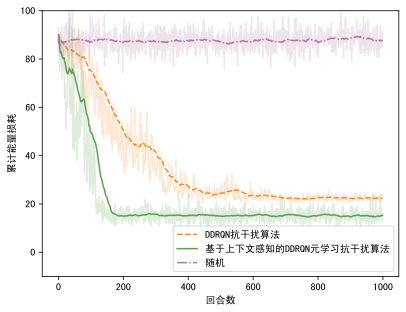

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

energy1 = energy1[:2000]
energy2 = energy2[:2000]
energy3 = energy3[:2000]

plt.plot(np.arange(len(energy1)), energy1, color='#f28e2b', alpha=0.2)
plt.plot(np.arange(len(energy1)), moving_average(energy1, ws), color='#f28e2b', label='DDRQN抗干扰算法', linestyle='dashed')

plt.plot(np.arange(len(energy2)), energy2, color='#59a14f', alpha=0.2)
plt.plot(np.arange(len(energy2)), moving_average(energy2, ws), color='#59a14f', label='基于上下文感知的DDRQN元学习抗干扰算法')

plt.plot(np.arange(len(energy3)), energy3, color='#b07aa1', alpha=0.2)
plt.plot(np.arange(len(energy3)), moving_average(energy3, ws), color='#b07aa1', label='随机', linestyle='-.')

plt.ylim(-10, 100)
# plt.xlim(0, 600)
plt.legend(loc='lower right')
plt.xlabel('回合数')
plt.ylabel('累计能量损耗')
plt.savefig('energy test.png', dpi=600)

# test hop

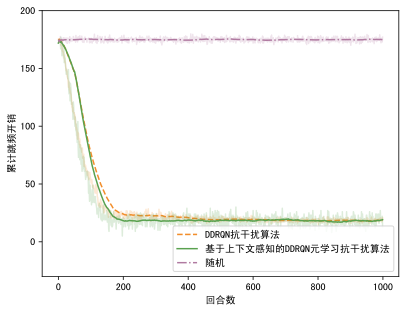

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

hop1 = hop1[:2000]
hop2 = hop2[:2000]
hop3 = hop3[:2000]

plt.plot(np.arange(len(hop1)), hop1, color='#f28e2b', alpha=0.2)
plt.plot(np.arange(len(hop1)), moving_average(hop1, ws), color='#f28e2b', label='DDRQN抗干扰算法', linestyle='dashed')

plt.plot(np.arange(len(hop2)), hop2, color='#59a14f', alpha=0.2)
plt.plot(np.arange(len(hop2)), moving_average(hop2, ws), color='#59a14f', label='基于上下文感知的DDRQN元学习抗干扰算法')

plt.plot(np.arange(len(hop3)), hop3, color='#b07aa1', alpha=0.2)
plt.plot(np.arange(len(hop3)), moving_average(hop3, ws), color='#b07aa1', label='随机', linestyle='-.')

plt.ylim(-30, 200)
# plt.xlim(0, 600)
plt.legend(loc='lower right')
plt.xlabel('回合数')
plt.ylabel('累计跳频开销')
plt.savefig('hop test.png', dpi=600)

# test success

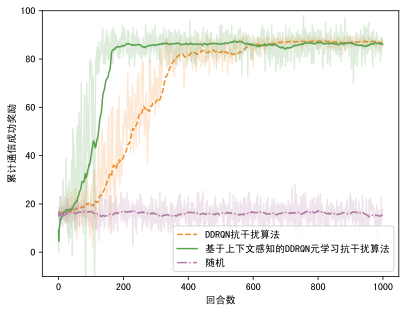

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

suc1 = suc1[:2000]
suc2 = suc2[:2000]
suc3 = suc3[:2000]

plt.plot(np.arange(len(suc1)), suc1, color='#f28e2b', alpha=0.2)
plt.plot(np.arange(len(suc1)), moving_average(suc1, ws), color='#f28e2b', label='DDRQN抗干扰算法', linestyle='dashed')

plt.plot(np.arange(len(suc2)), suc2, color='#59a14f', alpha=0.2)
plt.plot(np.arange(len(suc2)), moving_average(suc2, ws), color='#59a14f', label='基于上下文感知的DDRQN元学习抗干扰算法')

plt.plot(np.arange(len(suc3)), suc3, color='#b07aa1', alpha=0.2)
plt.plot(np.arange(len(suc3)), moving_average(suc3, ws), color='#b07aa1', label='随机', linestyle='-.')

plt.ylim(-10, 100)
plt.legend(loc='lower right')
plt.xlabel('回合数')
plt.ylabel('累计通信成功奖励')
plt.savefig('suc test.png', dpi=600)